In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as pt

# Gathering, processing and Cleaning the data

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Plotting

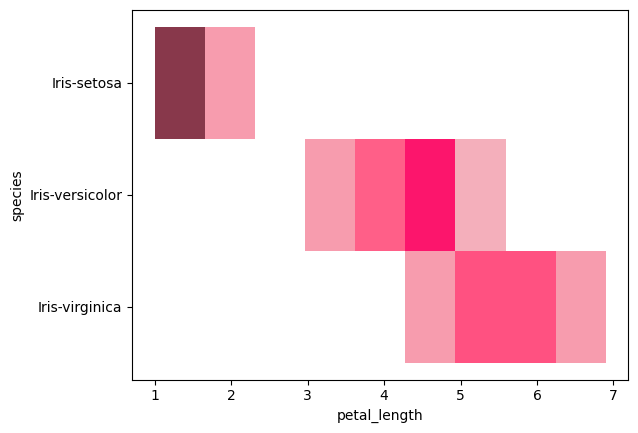

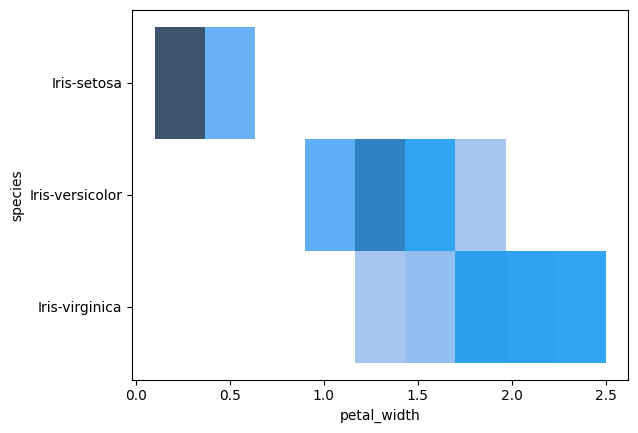

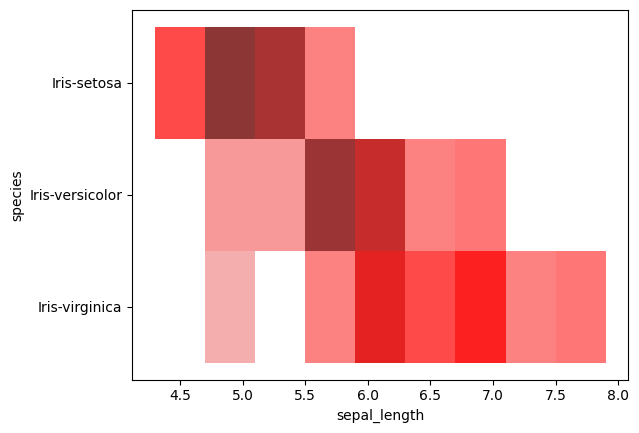

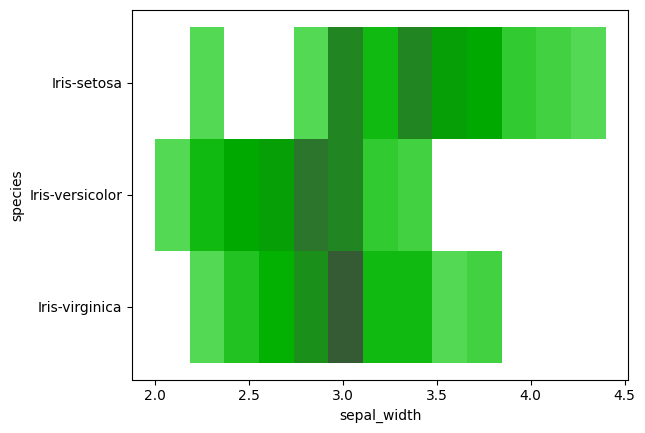

In [6]:
sb.histplot(data=df, x = 'petal_length', y = 'species', color = 'pink')
pt.show()
sb.histplot(data=df, x = 'petal_width', y = 'species')
pt.show()
sb.histplot(data=df, x = 'sepal_length', y = 'species', color = 'maroon')
pt.show()
sb.histplot(data=df, x = 'sepal_width', y = 'species', color = 'green')
pt.show()

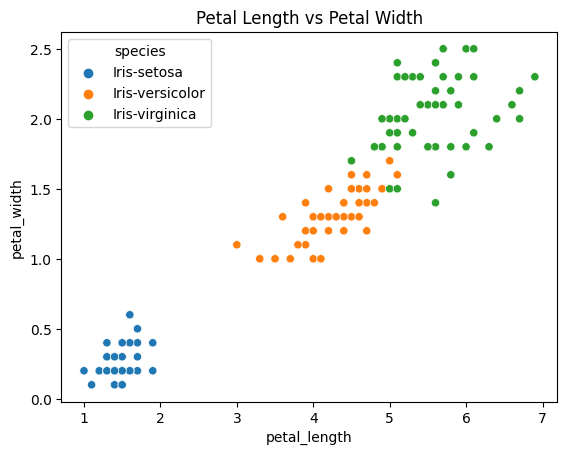

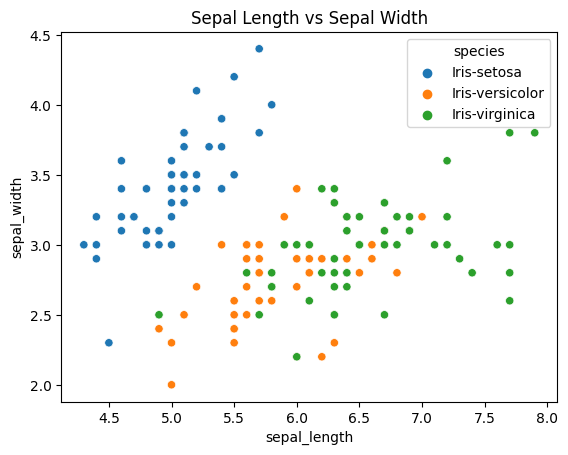

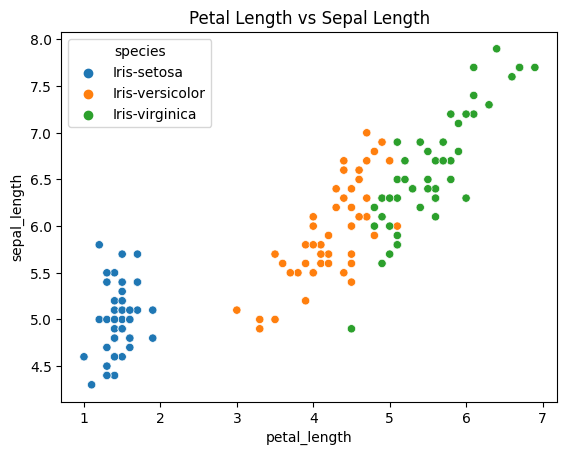

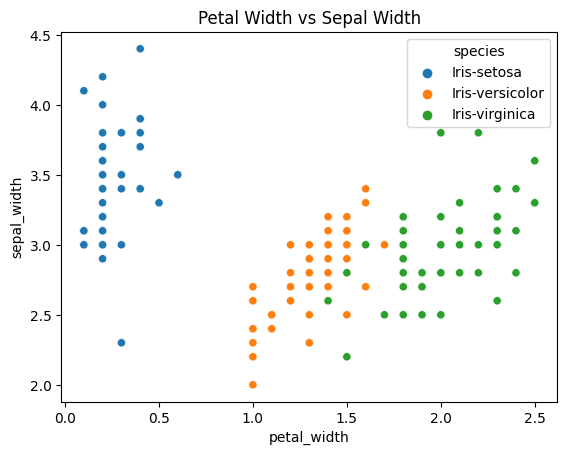

In [7]:
sb.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
pt.title('Petal Length vs Petal Width')
pt.show()

sb.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
pt.title('Sepal Length vs Sepal Width')
pt.show()

sb.scatterplot(x='petal_length', y='sepal_length', hue='species', data=df)
pt.title('Petal Length vs Sepal Length')
pt.show()

sb.scatterplot(x='petal_width', y='sepal_width', hue='species', data=df)
pt.title('Petal Width vs Sepal Width')
pt.show()

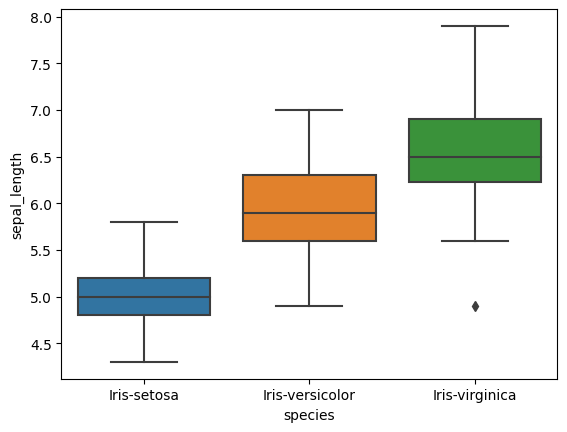

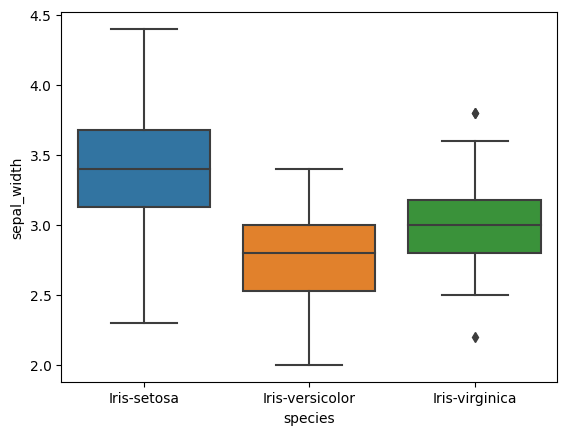

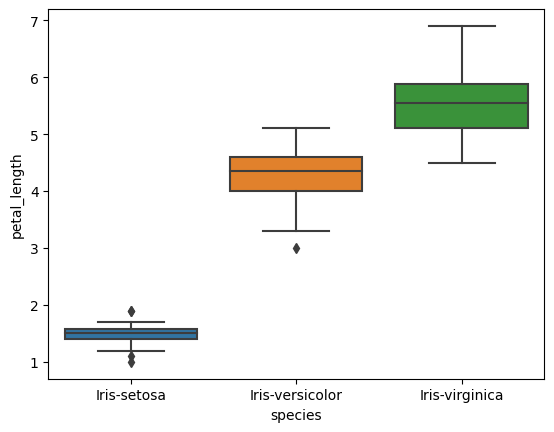

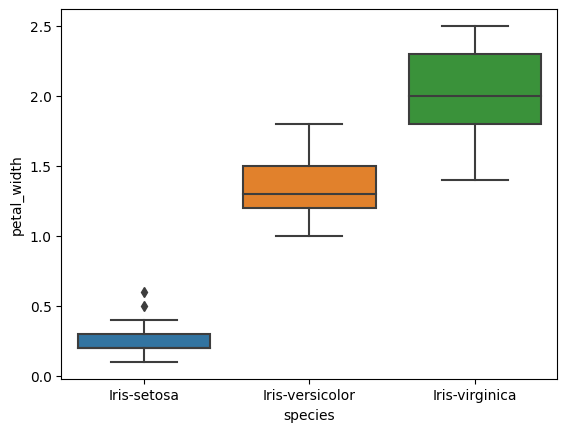

In [8]:
sb.boxplot(data=df,x='species', y='sepal_length')
pt.show()
sb.boxplot(data=df,x='species', y='sepal_width')
pt.show()
sb.boxplot(data=df,x='species', y='petal_length')
pt.show()
sb.boxplot(data=df,x='species', y='petal_width')
pt.show()

# Training and Testing using MLP Classifier

In [9]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #df.drop('species', axis=1)
y = df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)

In [12]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)

In [13]:
y_pred = mlp.predict(X_test)

# Metrics

In [14]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Prediction

In [16]:
pl = float(input('Enter petal length: '))
pw = float(input('Enter petal width: '))
sl = float(input('Enter sepal length: '))
sw = float(input('Enter sepal width: '))
print('The predicted iris flower is:' ,str(mlp.predict([[pl, pw, sl, sw]])[0]))

Enter petal length: 2
Enter petal width: 3
Enter sepal length: 1
Enter sepal width: 4
The predicted iris flower is: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [17]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import pickle
from google.colab import files

# Load the IRIS dataset
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url)

# Split the dataset into features and target
X = df.drop('species', axis=1)
y = df['species']

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)
mlp.fit(X, y)

# Save the trained model as a pkl file
file_path = 'mlp_model.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(mlp, file)

# Download the pkl file
files.download(file_path)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>